In [4]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def translate_adjacencies(adjacencies, correspondence=None):
    translated_adjacencies = adjacencies[:]
    if correspondence is not None:
        for i,(x,y) in enumerate(adjacencies):
            translated_adjacencies[i] = (translate(x, correspondence), translate(y,correspondence))
    return translated_adjacencies

def translate_channels(channel_list, correspondence=None):
    translated_channels = channel_list[:]
    if correspondence is not None:
        for i, x in enumerate(channel_list):
            translated_channels[i] = translate(x,correspondence)
    return translated_channels

def translate(val, correspondence):
    return correspondence[[x for (x,y) in correspondence].index(val)][1]

In [6]:
#produces pairs of probe site adjacencies from the electrode coordinates in physical space through Delauney tesselation,
#subject to a maximum site spacing (in microns) of max_edgelength. 
import numpy as np
import scipy.spatial as spatial

def adjacency_from_geometry(coords, channels, max_edgelength = 40, correspondence = None):
        
    c = np.array(coords)
    tess = spatial.Delaunay(coords)
    indices, indptr = tess.vertex_neighbor_vertices
    adjs = []
    for k in range(indices.shape[0]-1):
        for j in indptr[indices[k]:indices[k+1]]:
            try:
                if(spatial.distance.euclidean(c[k], c[j]) < max_edgelength):
                    adjs.append((channels[k],channels[j]))
            except:
                pass
    return adjs

In [8]:
intan = ['G', 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 'R', 'R',24, 25, 26,
         27, 28, 29, 30, 31, 0, 1, 2, 3, 4, 5, 6, 7, 'G']

nexus = ['G',23,25,27,29,31,19,17,21,11,15,13,1,3,5,7,9,'R','R',24,26,28,30,32,20,18,22,12,16,14,2,4,6,
         8,10,'G']

cor = list(zip(nexus, intan))

In [9]:
Buzsaki_shank1 = (
(0,0),
(-8.5, 20),
(8.5, 40),
(-10.5, 60),
(12.5, 80),
(-14.5, 100),
(16.5, 120),
(-18.5, 140)
)
shank1_channels = [5, 4, 6, 3, 7, 2, 8, 1]

Buzsaki_shank2 = [(x+200, y) for (x, y) in Buzsaki_shank1]
shank2_channels = [i + 8 for i in shank1_channels]

Buzsaki_shank3 = [(x+400, y) for (x, y) in Buzsaki_shank1]
shank3_channels = [i + (2*8) for i in shank1_channels]

Buzsaki_shank4 = [(x+600, y) for (x, y) in Buzsaki_shank1]
shank4_channels = [i + (3*8) for i in shank1_channels]

(-50.25, 648.25)

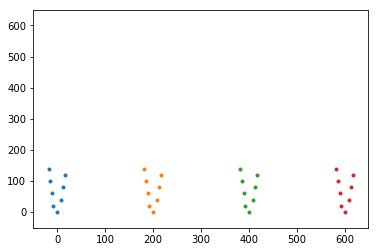

In [10]:
plt.plot([x for (x,y) in Buzsaki_shank1],[y for (x,y) in Buzsaki_shank1],'.')
plt.plot([x for (x,y) in Buzsaki_shank2],[y for (x,y) in Buzsaki_shank2],'.')
plt.plot([x for (x,y) in Buzsaki_shank3],[y for (x,y) in Buzsaki_shank3],'.')
plt.plot([x for (x,y) in Buzsaki_shank4],[y for (x,y) in Buzsaki_shank4],'.')
plt.ylim(plt.xlim())

In [11]:
geometry_shank1 = dict(zip(translate_channels(shank1_channels, cor), Buzsaki_shank1))
geometry_shank2 = dict(zip(translate_channels(shank2_channels, cor), Buzsaki_shank2))
geometry_shank3 = dict(zip(translate_channels(shank3_channels, cor), Buzsaki_shank3))
geometry_shank4 = dict(zip(translate_channels(shank4_channels, cor), Buzsaki_shank4))

In [12]:
a1 = adjacency_from_geometry(Buzsaki_shank1, shank1_channels, 50)
a2 = adjacency_from_geometry(Buzsaki_shank2, shank2_channels, 50)
a3 = adjacency_from_geometry(Buzsaki_shank3, shank3_channels, 50)
a4 = adjacency_from_geometry(Buzsaki_shank4, shank4_channels, 50)

In [13]:
b1 = translate_adjacencies(a1, cor)
b2 = translate_adjacencies(a2, cor)
b3 = translate_adjacencies(a3, cor)
b4 = translate_adjacencies(a4, cor)

# Create Final Dictionary

In [14]:
# create dictionary
channel_groups = {
    # Shank Index.
    0:
        {
            # List of channels to keep for spike detection
            'channels': translate_channels(shank1_channels, cor),
            
            # Adjacency graph. Dead channels will be automatically disarded
            # by considering the corresponding subgraph.
            'graph': translate_adjacencies(a1, cor),
            
            # 2D positions of the channels, only for visualization purposes
            # in KlustaViewa. The unit doesn't matter.
            'geometry': geometry_shank1,
        },
    1:
        {
            # List of channels to keep for spike detection
            'channels': translate_channels(shank2_channels, cor),
            
            # Adjacency graph. Dead channels will be automatically disarded
            # by considering the corresponding subgraph.
            'graph': translate_adjacencies(a2, cor),
            
            # 2D positions of the channels, only for visualization purposes
            # in KlustaViewa. The unit doesn't matter.
            'geometry': geometry_shank2,
        },
    2:
        {
            # List of channels to keep for spike detection
            'channels': translate_channels(shank3_channels, cor),
            
            # Adjacency graph. Dead channels will be automatically disarded
            # by considering the corresponding subgraph.
            'graph': translate_adjacencies(a3, cor),
            
            # 2D positions of the channels, only for visualization purposes
            # in KlustaViewa. The unit doesn't matter.
            'geometry': geometry_shank3,
        },
    3:
        {
            # List of channels to keep for spike detection
            'channels': translate_channels(shank4_channels, cor),
            
            # Adjacency graph. Dead channels will be automatically disarded
            # by considering the corresponding subgraph.
            'graph': translate_adjacencies(a4, cor),
            
            # 2D positions of the channels, only for visualization purposes
            # in KlustaViewa. The unit doesn't matter.
            'geometry': geometry_shank4,
        },
}

In [20]:
import pprint

pprint.pprint(channel_groups,indent=4)

{   0: {   'channels': [10, 4, 5, 11, 9, 3, 6, 12],
           'geometry': {   3: (-14.5, 100),
                           4: (-8.5, 20),
                           5: (8.5, 40),
                           6: (16.5, 120),
                           9: (12.5, 80),
                           10: (0, 0),
                           11: (-10.5, 60),
                           12: (-18.5, 140)},
           'graph': [   (10, 5),
                        (10, 4),
                        (4, 11),
                        (4, 5),
                        (4, 10),
                        (5, 4),
                        (5, 10),
                        (5, 11),
                        (5, 9),
                        (11, 3),
                        (11, 4),
                        (11, 5),
                        (11, 9),
                        (9, 5),
                        (9, 11),
                        (9, 3),
                        (9, 6),
                        (3, 6),
                    